In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
from tslearn.clustering import TimeSeriesKMeans
import pickle

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 90.

# Clustering for daily new cases

In [2]:
cases_state = pickle.load(open('pickle_files/cases_state.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

In [3]:
temp = cases_state.pivot(index='date', columns='state', values='cases_new')

In [4]:
temp.index = pd.to_datetime(temp.index)

In [5]:
df = temp.T.copy() 

In [6]:
ppl = ppl[1:] # remove malaysia total pupulation row

In [7]:
ppl = ppl.groupby('state')['pop'].sum()
ppl = pd.DataFrame(ppl)

In [8]:
df_pT =  df / ppl.loc[df.index].values * 100000

In [9]:
last_day = df.columns[-1]

In [10]:
df_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

In [11]:
df.sort_values([last_day], ascending=False, axis=0, inplace=True)

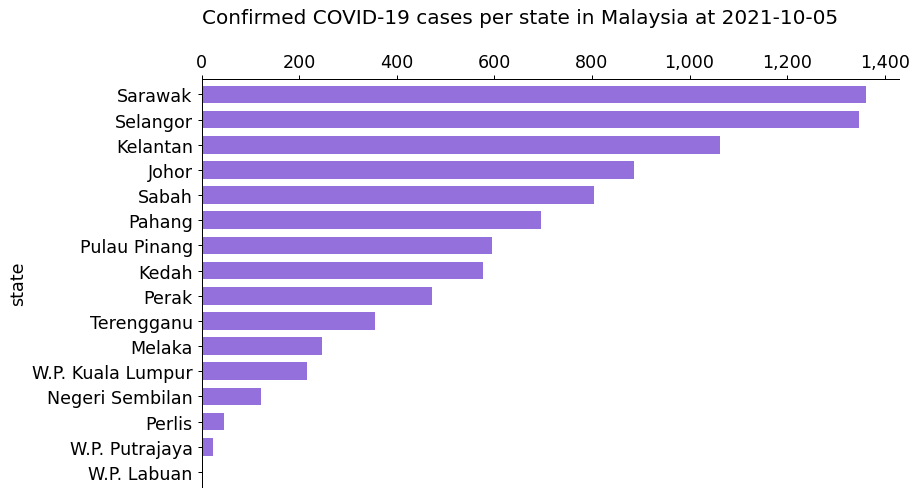

In [12]:
ax = df.iloc[:, -1].head(16).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='mediumpurple')
ax.set_title('Confirmed COVID-19 cases per state in Malaysia at 2021-10-05\n', fontsize=16,loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

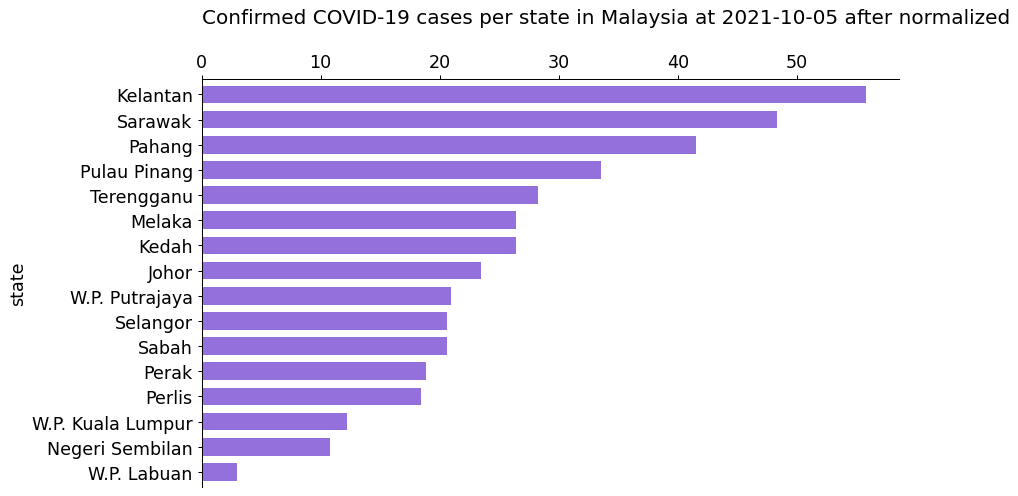

In [13]:
ax = df_pT.iloc[:, -1].head(16).plot(kind='barh',
                                        figsize=(10, 6),
                                        width=0.7,
                                        color='mediumpurple')
ax.set_title('Confirmed COVID-19 cases per state in Malaysia at 2021-10-05 after normalized\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

COVID-19 daily cases vs time curves
50950.619 --> 37489.137 --> 36167.107 --> 36167.107 --> 
orange cluster, N = 5
turquoise cluster, N = 1
limegreen cluster, N = 10
[0:orange, 1:turquoise,2:limegreen]


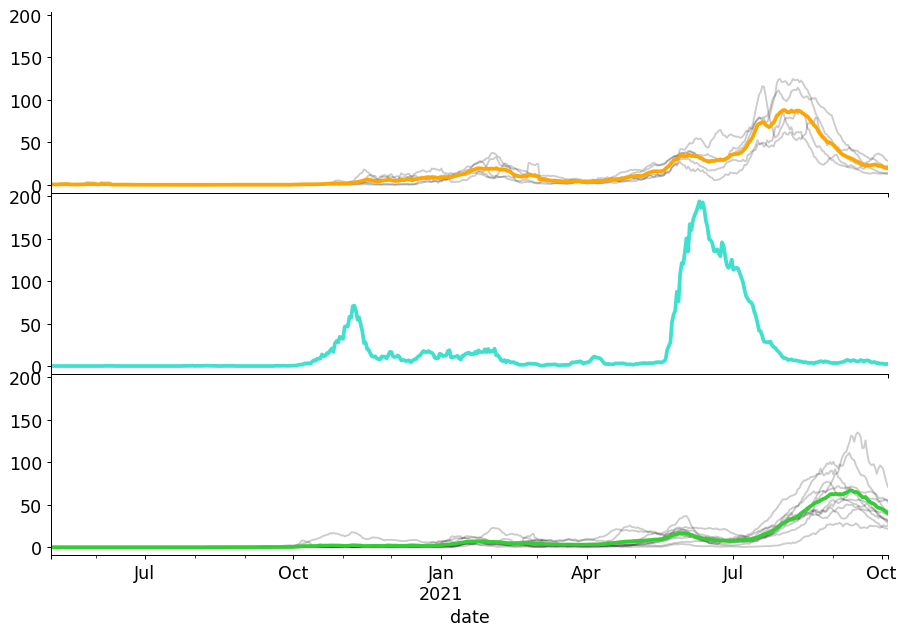

In [14]:
from tslearn.utils import to_time_series_dataset
cluster = 3
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen']
names = ['orange cluster','turquoise cluster','limegreen cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 daily cases vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2],[ax1,ax2,ax3]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
print("[0:orange, 1:turquoise,2:limegreen]")
f.subplots_adjust(hspace=0)
#plt.ylim(-10, 220)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [15]:
print('Label for each state after clustering')
c = clusters.sort_values()

Label for each state after clustering


In [42]:
pd.DataFrame(c.map({0:'orange', 1:'turquoise',2:'limegreen'}))

,0
state,
Perlis,orange
Sarawak,orange
Kelantan,orange
Perak,orange
Johor,orange
Terengganu,orange
Kedah,orange
Sabah,orange
Pahang,orange


COVID-19 deaths vs time curves
41810.367 --> 31437.367 --> 29137.378 --> 29137.378 --> 
orange cluster, N = 3
turquoise cluster, N = 1
limegreen cluster, N = 9
green cluster, N = 3
[0:orange, 1:turquoise,2:limegreen,3:'green']


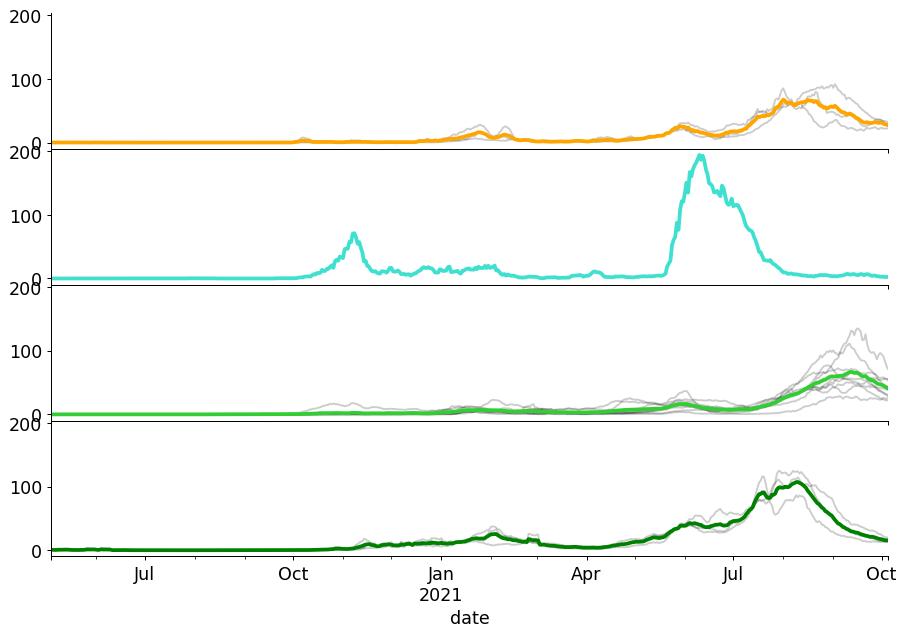

In [17]:
from tslearn.utils import to_time_series_dataset
cluster = 4
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen','green']
names = ['orange cluster','turquoise cluster','limegreen cluster','green cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3,ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2,3],[ax1,ax2,ax3,ax4]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
print("[0:orange, 1:turquoise,2:limegreen,3:'green']")
f.subplots_adjust(hspace=0)
#plt.ylim(-10, 220)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [18]:
print('Label for each state after clustering')
clusters.sort_values()

Label for each state after clustering


state
Melaka               0
Kedah                0
W.P. Putrajaya       0
W.P. Labuan          1
Kelantan             2
Sarawak              2
Pahang               2
Pulau Pinang         2
Terengganu           2
Johor                2
Sabah                2
Perak                2
Perlis               2
Selangor             3
W.P. Kuala Lumpur    3
Negeri Sembilan      3
dtype: int64

COVID-19 deaths vs time curves
29951.724 --> 24734.943 --> 24734.943 --> 
orange cluster, N = 3
turquoise cluster, N = 1
limegreen cluster, N = 9
green cluster, N = 1
yellow cluster, N = 2
[0:orange, 1:turquoise,2:limegreen,3:green,4:yellow]


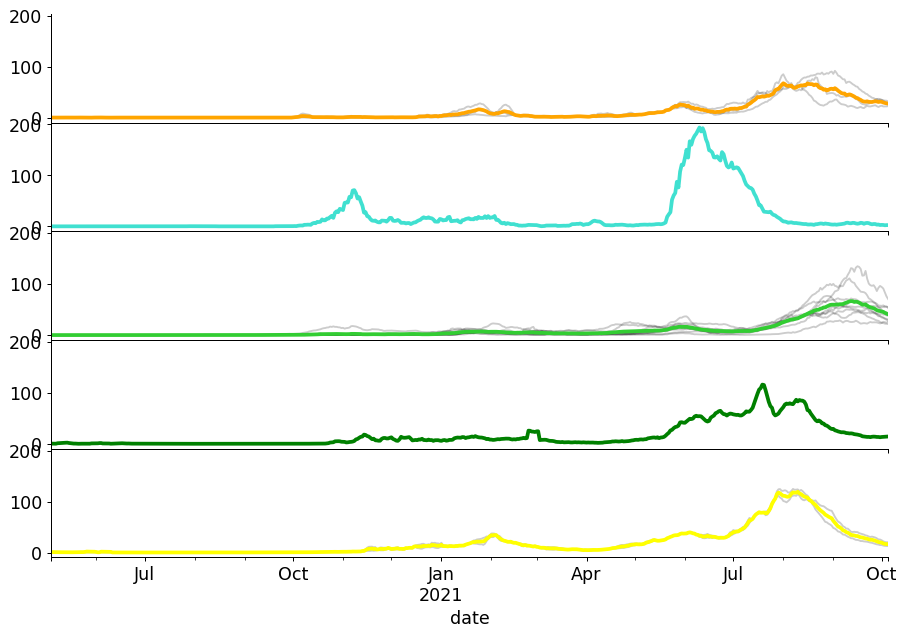

In [19]:
from tslearn.utils import to_time_series_dataset
cluster = 5
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen','green','yellow']
names = ['orange cluster','turquoise cluster','limegreen cluster','green cluster','yellow cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2,3,4],[ax1,ax2,ax3,ax4,ax5]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['right'].set_visible(False)
print("[0:orange, 1:turquoise,2:limegreen,3:green,4:yellow]")
f.subplots_adjust(hspace=0)
#plt.ylim(-10, 220)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [20]:
print('Label for each state after clustering')
clusters.sort_values()

Label for each state after clustering


state
Melaka               0
Kedah                0
W.P. Putrajaya       0
W.P. Labuan          1
Kelantan             2
Sarawak              2
Pahang               2
Pulau Pinang         2
Terengganu           2
Johor                2
Sabah                2
Perak                2
Perlis               2
Negeri Sembilan      3
Selangor             4
W.P. Kuala Lumpur    4
dtype: int64

# ----------------------------------------This is a break line ----------------------------------

# Clustering for death case

In [21]:
death_state = pickle.load(open('pickle_files/deaths_state.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

In [22]:
death_state

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
0,2020-03-17,Johor,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9083,2021-10-05,Selangor,14,2,0,0,0,0,4
9084,2021-10-05,Terengganu,5,0,1,0,0,0,3
9085,2021-10-05,W.P. Kuala Lumpur,4,1,0,0,0,0,2
9086,2021-10-05,W.P. Labuan,0,0,0,0,0,0,0


In [23]:
population = pd.read_csv('dataset/static/population_moh.csv')

In [24]:
temp = death_state.pivot(index='date', columns='state', values='deaths_new')

In [25]:
temp.index = pd.to_datetime(temp.index)

In [26]:
df = temp.T.copy()

In [27]:
ppl = ppl[1:]

In [28]:
ppl = ppl.groupby('state')['pop'].sum()
ppl = pd.DataFrame(ppl)

In [29]:
df_pT =  df / ppl.loc[df.index].values * 100000

In [30]:
last_day = df.columns[-1]

In [31]:
df_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

In [32]:
df.sort_values([last_day], ascending=False, axis=0, inplace=True)

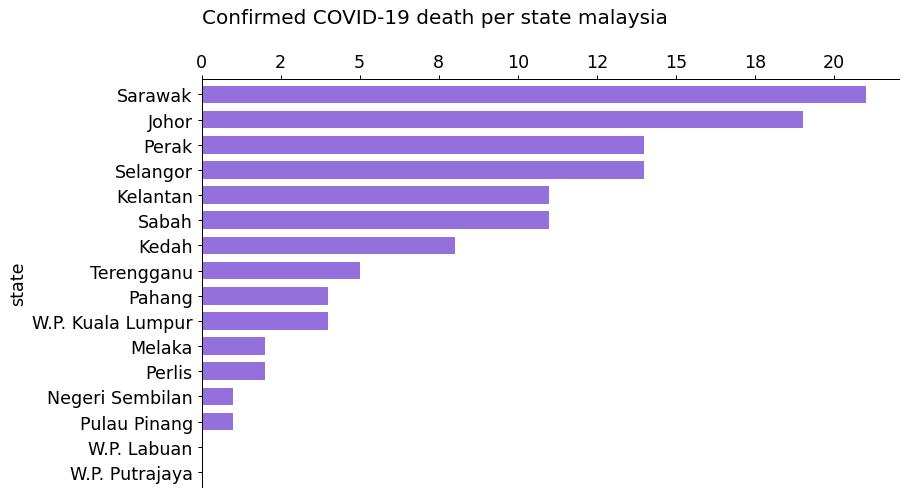

In [33]:
ax = df.iloc[:, -1].head(16).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='mediumpurple')
ax.set_title('Confirmed COVID-19 death per state malaysia\n', fontsize=16,loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

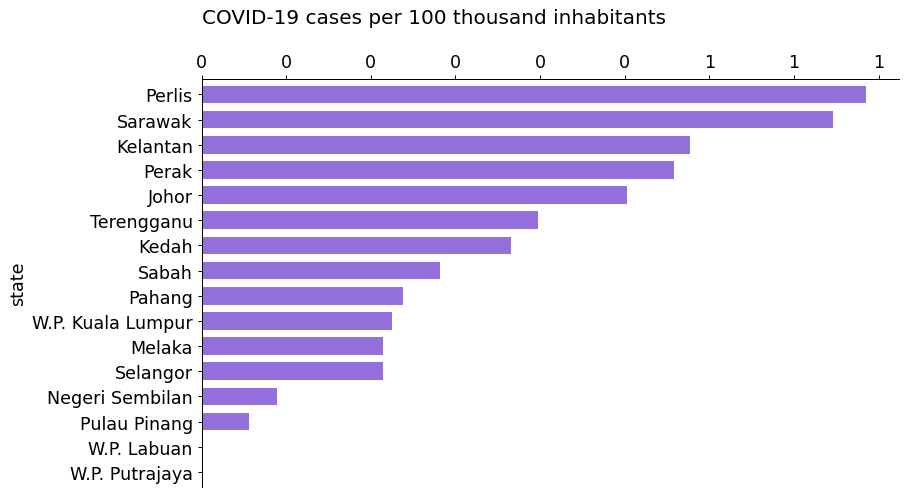

In [34]:
ax = df_pT.iloc[:, -1].head(16).plot(kind='barh',
                                        figsize=(10, 6),
                                        width=0.7,
                                        color='mediumpurple')
ax.set_title('COVID-19 cases per 100 thousand inhabitants\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

COVID-19 deaths vs time curves
18.934 --> 11.966 --> 11.966 --> 
orange cluster, N = 11
turquoise cluster, N = 1
limegreen cluster, N = 4
[0:orange, 1:turquoise,2:limegreen]


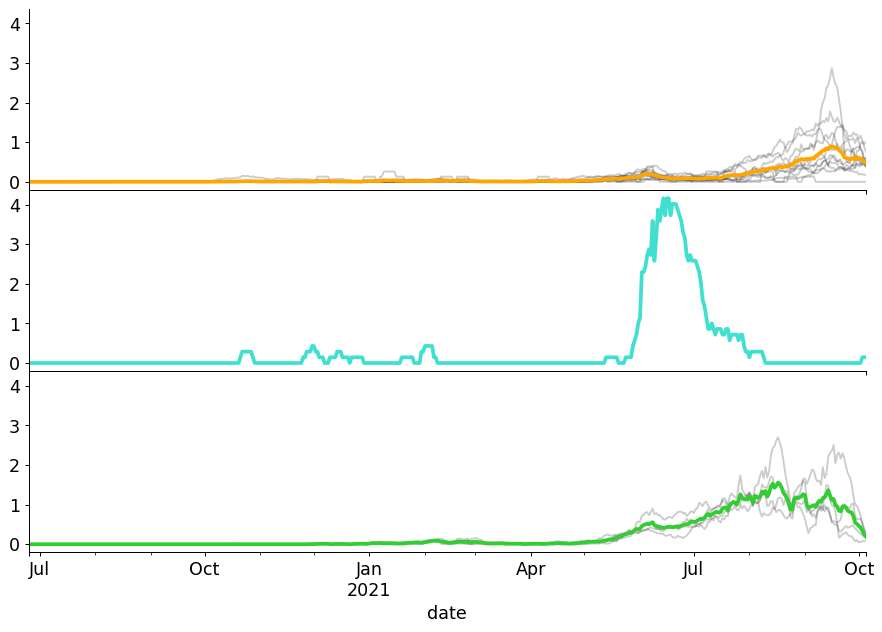

In [35]:
from tslearn.utils import to_time_series_dataset
cluster = 3
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen']
names = ['orange cluster','turquoise cluster','limegreen cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2],[ax1,ax2,ax3]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

print("[0:orange, 1:turquoise,2:limegreen]")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
#plt.ylim(-0.26, 5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [36]:
print('Label for each state after clustering')
clusters.sort_values()

Label for each state after clustering


state
Perlis               0
Sarawak              0
Kelantan             0
Perak                0
Johor                0
Terengganu           0
Kedah                0
Sabah                0
Pahang               0
Pulau Pinang         0
W.P. Putrajaya       0
W.P. Labuan          1
W.P. Kuala Lumpur    2
Melaka               2
Selangor             2
Negeri Sembilan      2
dtype: int64

In [37]:
c = clusters.sort_values()
c.map({0:'orange', 1:'turquoise',2:'limegreen'})

state
Perlis                  orange
Sarawak                 orange
Kelantan                orange
Perak                   orange
Johor                   orange
Terengganu              orange
Kedah                   orange
Sabah                   orange
Pahang                  orange
Pulau Pinang            orange
W.P. Putrajaya          orange
W.P. Labuan          turquoise
W.P. Kuala Lumpur    limegreen
Melaka               limegreen
Selangor             limegreen
Negeri Sembilan      limegreen
dtype: object

COVID-19 deaths vs time curves
11.242 --> 6.422 --> 6.422 --> 
orange cluster, N = 8
turquoise cluster, N = 1
limegreen cluster, N = 3
darkblue, N = 4
[0:orange, 1:turquoise,2:limegreen,3:'darkblue']


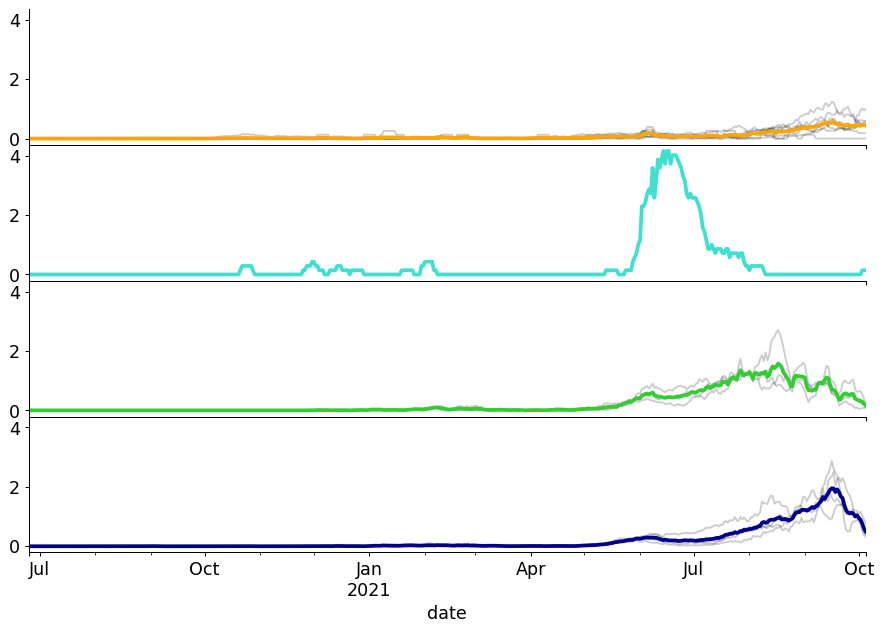

In [38]:
from tslearn.utils import to_time_series_dataset
cluster = 4
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen','darkblue']
names = ['orange cluster','turquoise cluster','limegreen cluster','darkblue']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3,ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2,3],[ax1,ax2,ax3,ax4]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

print("[0:orange, 1:turquoise,2:limegreen,3:'darkblue']")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
#plt.ylim(-0.26, 5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [39]:
print('Label for each state after clustering')
clusters.sort_values()

Label for each state after clustering


state
Perlis               0
Sarawak              0
Kelantan             0
Perak                0
Terengganu           0
Sabah                0
Pahang               0
W.P. Putrajaya       0
W.P. Labuan          1
W.P. Kuala Lumpur    2
Melaka               2
Negeri Sembilan      2
Johor                3
Kedah                3
Selangor             3
Pulau Pinang         3
dtype: int64

COVID-19 deaths vs time curves
7.619 --> 5.035 --> 5.035 --> 
orange cluster, N = 8
turquoise cluster, N = 1
limegreen cluster, N = 1
green cluster, N = 4
yellow cluster, N = 2
[0:orange, 1:turquoise,2:limegreen,3:green,4:yellow]


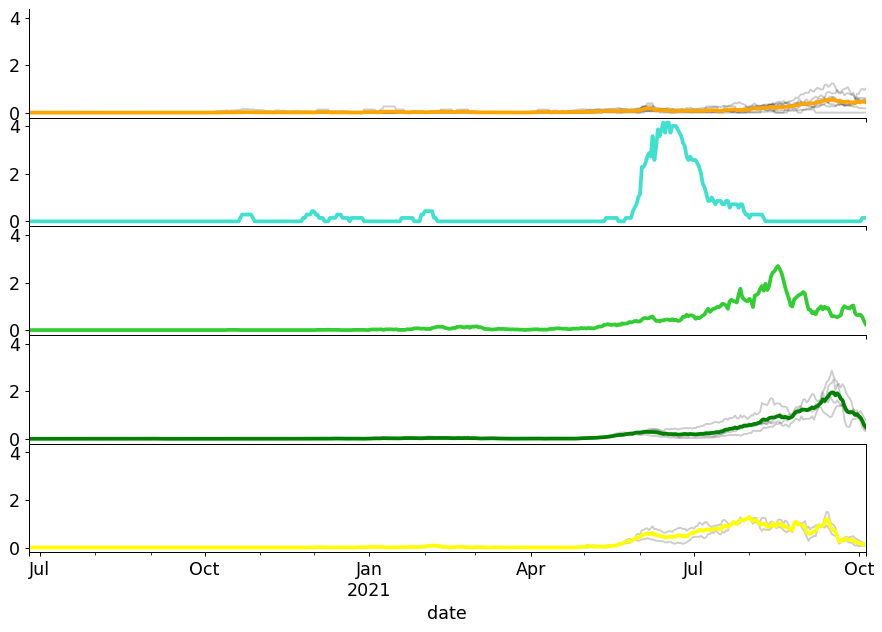

In [40]:
from tslearn.utils import to_time_series_dataset
cluster = 5
df = df_pT.iloc[:,100:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['orange', 'turquoise', 'limegreen','green','yellow']
names = ['orange cluster','turquoise cluster','limegreen cluster','green cluster','yellow cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, sharex=True, sharey=True,figsize=(12,8))

for yi,cl,xs in zip(range(cluster),[0,1,2,3,4],[ax1,ax2,ax3,ax4,ax5]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
print("[0:orange, 1:turquoise,2:limegreen,3:green,4:yellow]")
f.subplots_adjust(hspace=0)
#plt.ylim(-10, 220)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [41]:
print('Label for each state after clustering')
clusters.sort_values()

Label for each state after clustering


state
Perlis               0
Sarawak              0
Kelantan             0
Perak                0
Terengganu           0
Sabah                0
Pahang               0
W.P. Putrajaya       0
W.P. Labuan          1
W.P. Kuala Lumpur    2
Johor                3
Kedah                3
Selangor             3
Pulau Pinang         3
Melaka               4
Negeri Sembilan      4
dtype: int64